In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Analyst Capstone/survey_results_public.csv')

In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


# Data Wrangling ⭐


In [5]:
df.shape

(65437, 114)

This data set contains 65437 rows and 114 columns.


In [6]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


*Info about dataset* ✈

In [7]:
print(" Basic Info :\n")
df.info()
print("-"*80)
# Detailed missing value summary
print('\nMissing Values Summary :\n')
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)
print("-"*80)
print('\nDatatypes :\n')
print(df.dtypes)

 Basic Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
--------------------------------------------------------------------------------

Missing Values Summary :

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64
--------------------------------------------------------------------------------

Datatypes :

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                    

In [8]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Number of duplicate rows is 0

In [9]:
missing_values = df.isnull().sum()
df1 =missing_values.reset_index()
headers = ['column','count']
df1.columns = headers
df1['Missing Percentage'] = (df1['count']/len(df))*100
df1.sort_values(by='count', ascending=False).reset_index(drop=True)


,column,count,Missing Percentage
0,AINextMuch less integrated,64289,98.245641
1,AINextLess integrated,63082,96.401119
2,AINextNo change,52939,80.900714
3,AINextMuch more integrated,51999,79.464217
4,EmbeddedAdmired,48704,74.428840
...,...,...,...
109,MainBranch,0,0.000000
110,Age,0,0.000000
111,Employment,0,0.000000
112,Check,0,0.000000


In [10]:
df["Country"].value_counts()

,count
Country,
United States of America,11095
Germany,4947
India,4231
United Kingdom of Great Britain and Northern Ireland,3224
Ukraine,2672
...,...
"Micronesia, Federated States of...",1
Nauru,1
Chad,1


Mapping weird Country name with correct names ✈

In [11]:
country_mapping = {
   "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
   "Hong Kong (S.A.R.)" : "Hong Kong",
   "Iran, Islamic Republic of..." : "Iran",
   "Viet Nam" : "Vietnam",
   "Republic of Korea" : "South Korea",
   "Venezuela, Bolivarian Republic of..." : "Venezuela",
   "Congo, Republic of the..." : "Congo"


}

# Apply mapping to the column
df['Country'] = df['Country'].replace(country_mapping)
df['Country'].value_counts()

,count
Country,
United States of America,11095
Germany,4947
India,4231
United Kingdom,3224
Ukraine,2672
...,...
"Micronesia, Federated States of...",1
Nauru,1
Chad,1


In [12]:
df['Country'].fillna('Unknown', inplace=True)

In [13]:
df["Country"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
65437 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [14]:
df['EdLevel'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: EdLevel
Non-Null Count  Dtype 
--------------  ----- 
60784 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [15]:
df['EdLevel'].fillna('Other', inplace=True)

Mapping to the EdLevel column  ✈

In [16]:
edlevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
    "Some college/university study without earning a degree": "Some College",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Primary/elementary school": "Primary",
    "Something else": "Other"
}

# Apply the mapping to the EdLevel column
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)
df['EdLevel'].value_counts()

,count
EdLevel,
Bachelor,24942
Master,15557
Some College,7651
Secondary,5793
Other,5585
Professional,2970
Associate,1793
Primary,1146


In [17]:
df['Employment'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: Employment
Non-Null Count  Dtype 
--------------  ----- 
65437 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [18]:
df["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
65437 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [19]:
df["Age"].value_counts()

,count
Age,
25-34 years old,23911
35-44 years old,14942
18-24 years old,14098
45-54 years old,6249
55-64 years old,2575
Under 18 years old,2568
65 years or older,772
Prefer not to say,322


In [20]:
null_counts = df[["JobSat","SurveyEase","SurveyLength","Industry","CompTotal","YearsCode","DevType","LearnCode","RemoteWork"]].isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

,0
Industry,36579
JobSat,36311
CompTotal,31697
RemoteWork,10631
SurveyLength,9255
SurveyEase,9199
DevType,5992
YearsCode,5568
LearnCode,4949


In [21]:
cols_to_fill = [ "SurveyEase", "SurveyLength",
                "YearsCode", "DevType", "LearnCode", "RemoteWork"]

# Replace NaN with mode for each column
for col in cols_to_fill:
    mode_val = df[col].mode().iloc[0]  # Take the first mode if multiple exist
    df[col].fillna(mode_val, inplace=True)

In [22]:
df = df.dropna(subset=['Industry', 'JobSat', 'CompTotal'], how='all')

In [23]:
null_counts = df[["JobSat","Industry","CompTotal"]].isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

,0
Industry,11718
JobSat,11450
CompTotal,6836


In [24]:
mode_val = df["CompTotal"].mode().iloc[0]  # Takes the first mode if multiple exist

# Step 2: Fill NaN with the mode
df["CompTotal"].fillna(mode_val, inplace=True)

In [25]:
df = df.dropna(subset=['Industry', 'JobSat'], how='all')

In [26]:
null_counts = df[["JobSat","Industry","CompTotal"]].isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

,0
Industry,376
JobSat,108
CompTotal,0


In [27]:
cols_to_fill = ["JobSat","Industry" ]

# Replace NaN with mode for each column
for col in cols_to_fill:
    mode_val = df[col].mode().iloc[0]  # Take the first mode if multiple exist
    df[col].fillna(mode_val, inplace=True)

In [28]:
null_counts = df[["JobSat","Industry","CompTotal"]].isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

,0
JobSat,0
Industry,0
CompTotal,0


In [29]:
missing_values = df.isnull().sum()
df1 =missing_values.reset_index()
headers = ['column','count']
df1.columns = headers
df1['Missing Percentage'] = (df1['count']/len(df))*100
df1.sort_values(by='count', ascending=False).reset_index(drop=True)

,column,count,Missing Percentage
0,AINextMuch less integrated,28719,98.238353
1,AINextLess integrated,28180,96.394609
2,AINextNo change,22856,78.182938
3,AINextMuch more integrated,22401,76.626531
4,EmbeddedAdmired,21207,72.542245
...,...,...,...
109,AISelect,0,0.000000
110,Industry,0,0.000000
111,SurveyLength,0,0.000000
112,SurveyEase,0,0.000000


In [30]:
# Get list of columns where missing percentage is more than 50%
cols_to_drop = df1[df1['Missing Percentage'] > 50]['column'].tolist()

# Drop those columns from the original DataFrame
df = df.drop(columns=cols_to_drop)

In [31]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [32]:
df.isnull().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
JobSatPoints_11,0
SurveyLength,0
SurveyEase,0
ConvertedCompYearly,0


Saving the cleand dataset to csv file ✈

In [33]:
df.to_csv("cleaned_stackoverflow.csv", index=False)

In [ ]:
from google.colab import files
files.download("cleaned_stackoverflow.csv")

Creating separate dataframes containing exploded values of relevant columns ✈

In [35]:


# List of columns to process
columns_to_split = [
    "LanguageHaveWorkedWith",
    "LanguageWantToWorkWith",
    "DatabaseHaveWorkedWith",
    "DatabaseWantToWorkWith",
    "PlatformHaveWorkedWith",
    "PlatformWantToWorkWith",
    "WebframeHaveWorkedWith",
    "WebframeWantToWorkWith"
]

# Function to split comma-separated values and create a new dataframe
def split_column_to_new_df(original_df, column_name):
    # Split the column into separate rows
    split_df = original_df[['ResponseId', column_name]].copy()
    split_df[column_name] = split_df[column_name].str.split(';')
    split_df = split_df.explode(column_name)

    # Clean up whitespace
    split_df[column_name] = split_df[column_name].str.strip()

    # Remove empty values
    split_df = split_df[split_df[column_name].notna() & (split_df[column_name] != '')]

    return split_df

# Create and store all the new dataframes
cleaned_dfs = {}
for column in columns_to_split:
    new_df_name = f"{column}_Cleaned"
    cleaned_dfs[new_df_name] = split_column_to_new_df(df, column)


    cleaned_dfs[new_df_name].to_csv(f"{new_df_name}.csv", index=False)


# Exploratary Data Analysis ⭐

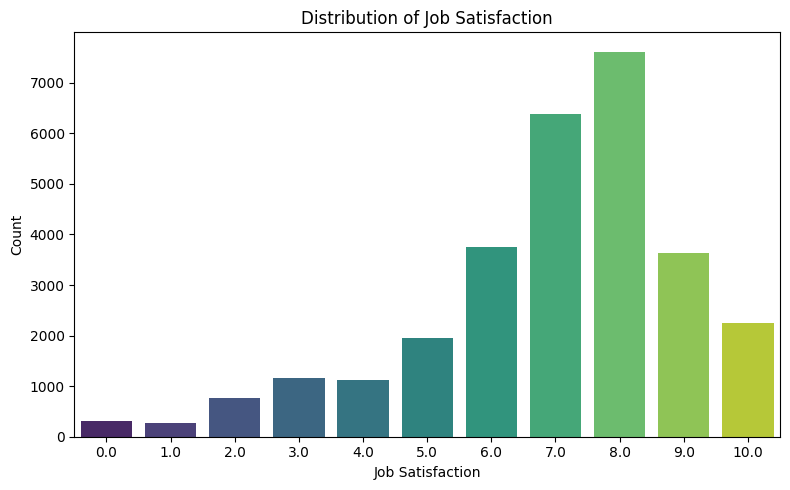

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x='JobSat', data=df, palette='viridis')

# Customize plot
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.tight_layout()

# Show plot
plt.show()

Majority of respondent rate job satisfaction as 8 on a scale of 10

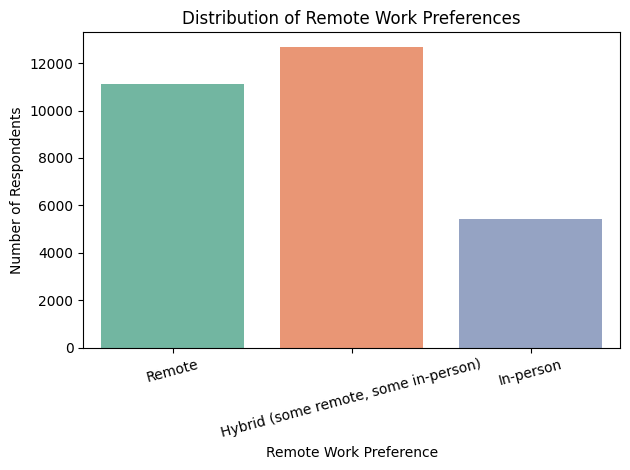

In [37]:
sns.countplot(x='RemoteWork', data=df, palette='Set2', hue='RemoteWork')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


The work Preference was Hybrid by most of the respondents

In [38]:
def convert_years(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCode'] = df['YearsCode'].apply(convert_years)

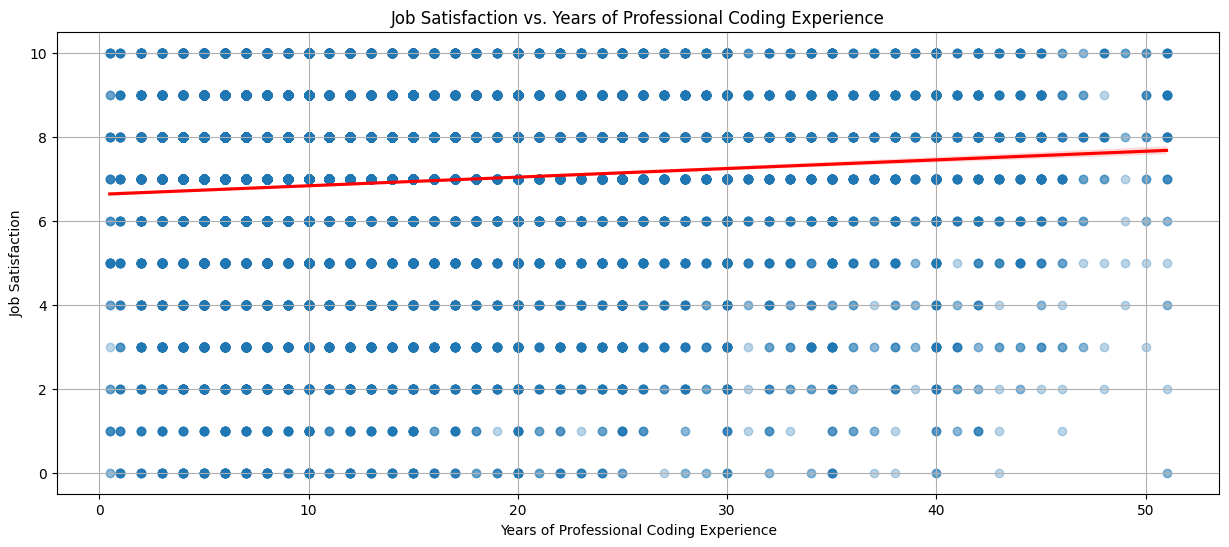

In [39]:

plt.figure(figsize=(15, 6))
sns.regplot(data=df, x='YearsCode', y='JobSat', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Job Satisfaction vs. Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()

The Job Satisfaction increases with the Years of Coding Experience

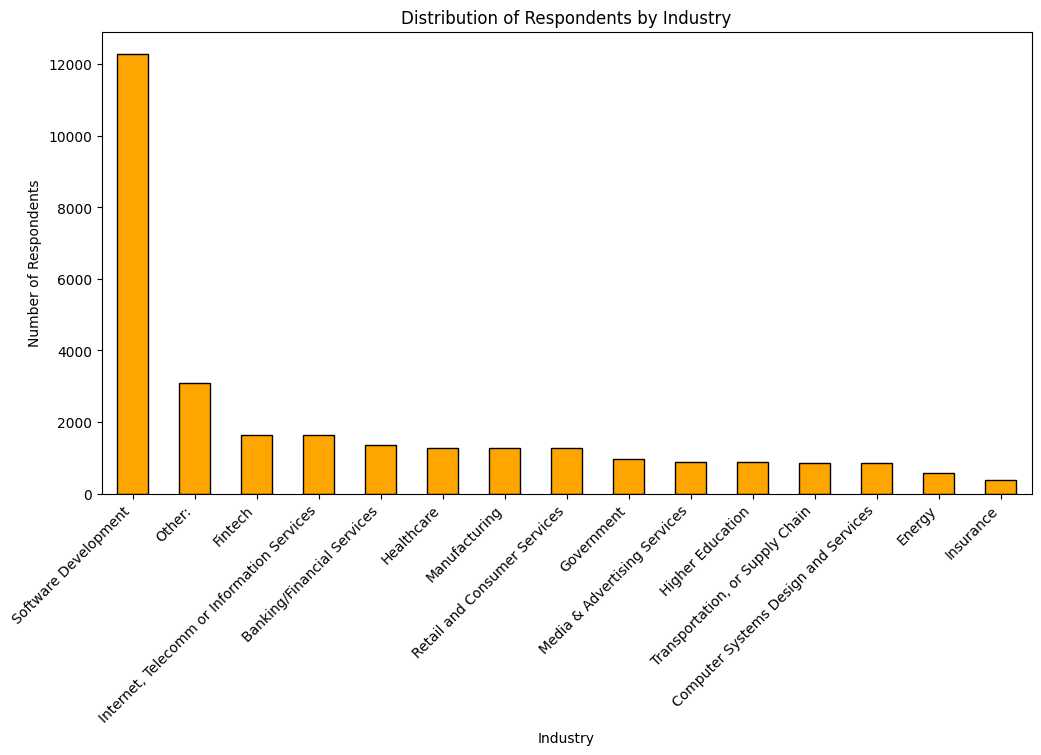

,count
Industry,
Software Development,12294
Other:,3077
Fintech,1641
"Internet, Telecomm or Information Services",1629
Banking/Financial Services,1371
Healthcare,1277
Manufacturing,1265
Retail and Consumer Services,1264
Government,962


In [40]:
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')

plt.show()
industry_counts

Most of the respondent comes from Software Developement Industry equal to 12294

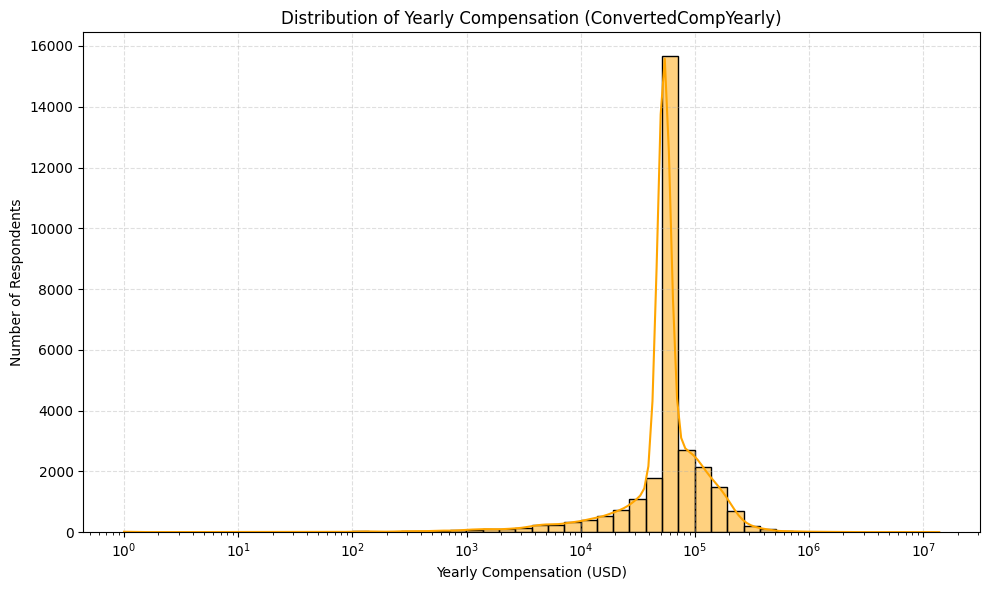

In [41]:
plt.figure(figsize=(10, 6))

sns.histplot(df['ConvertedCompYearly'], kde=True, bins=50, log_scale=True, color='orange')

plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [42]:
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Step 2: Drop missing values in compensation column
comp_median = full_time_df['ConvertedCompYearly'].median()

# Step 3: Display the result
print(f"Median Yearly Compensation (Full-Time Employees): ${comp_median:,.2f}")

Median Yearly Compensation (Full-Time Employees): $53,703.00


Median Compensation of full time employees is $53,703

In [43]:
df_median = df[['Country', 'ConvertedCompYearly']]
median_by_country = df_median.groupby('Country')['ConvertedCompYearly'].median()

# Step 3: Sort descending and get top 10
top_10 = median_by_country.sort_values(ascending=False).head(10)

# Show result
print(top_10)

Country
Andorra                     123517.0
Haiti                        90000.0
United States of America     87000.0
Isle of Man                  79617.5
Switzerland                  72421.0
Luxembourg                   70888.0
Norway                       68555.5
Canada                       53793.0
Antigua and Barbuda          53703.0
Angola                       53703.0
Name: ConvertedCompYearly, dtype: float64


Median Compensation for Respondents from United States is $87000

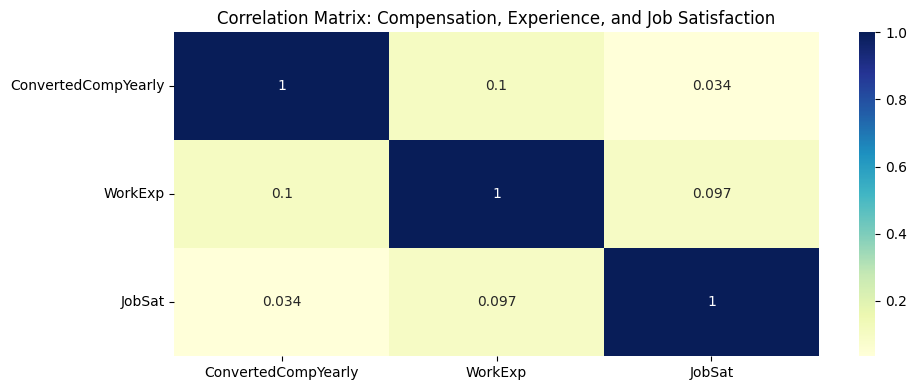

In [44]:
corr_df = df[['ConvertedCompYearly', 'WorkExp', 'JobSat']]


corr_matrix = corr_df.corr(method='pearson')


plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix: Compensation, Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()


Correlations between ConvertedCompYearly, WorkExp and JobSat

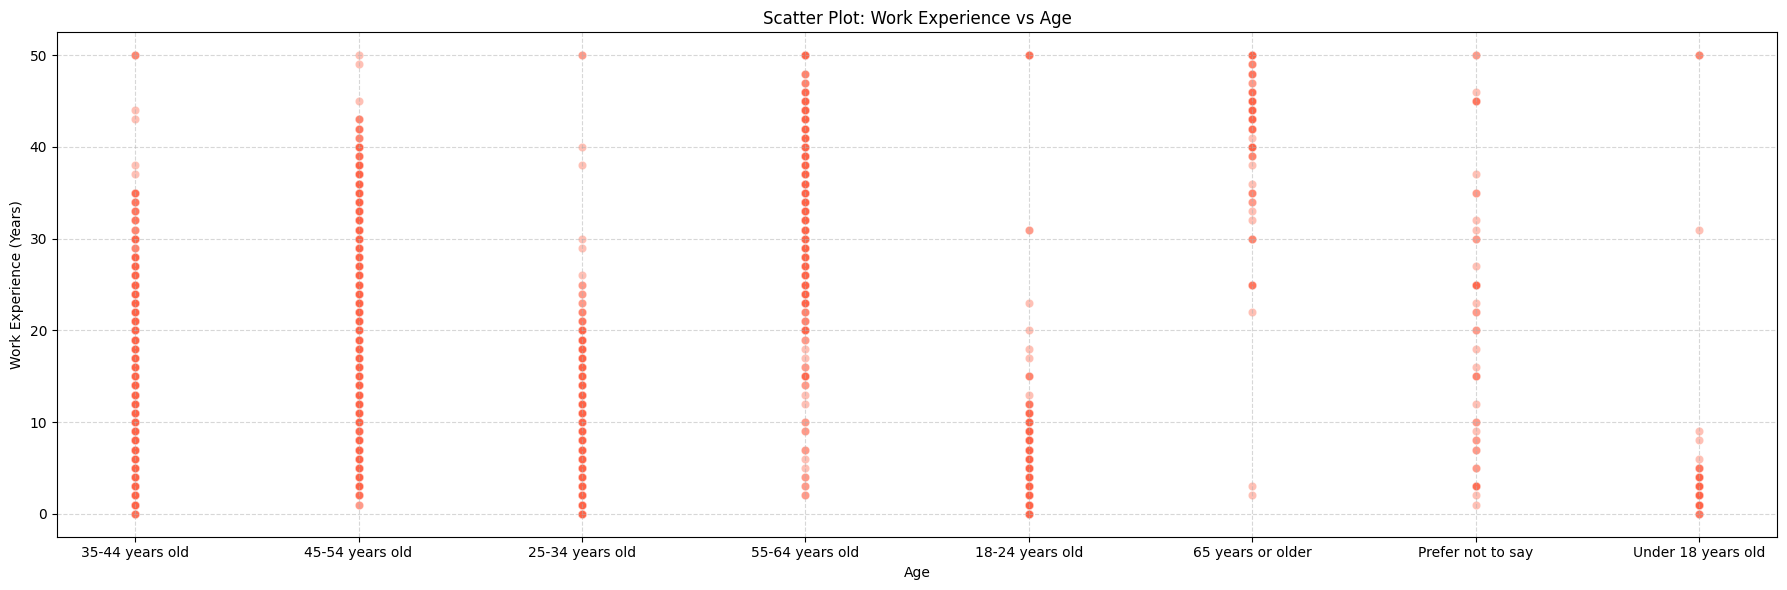

In [45]:
plt.figure(figsize=(18, 6))
sns.scatterplot(data=df, x='Age', y='WorkExp', alpha=0.4, color='tomato')
plt.title('Scatter Plot: Work Experience vs Age')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

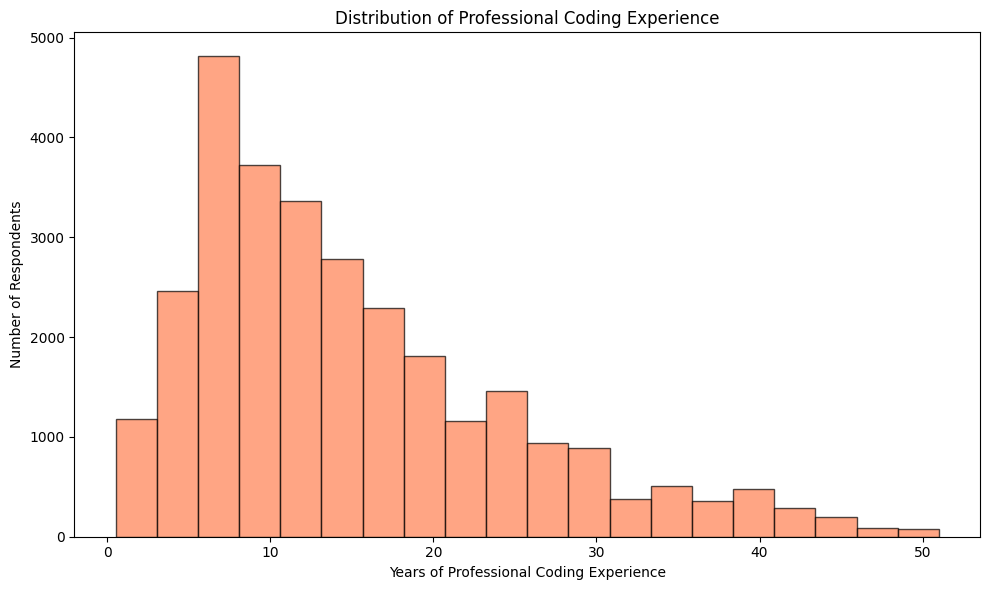

In [46]:
df['YearsCode'] = df['YearsCode'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '55'
})


plt.figure(figsize=(10, 6))
plt.hist(df['YearsCode'], bins=20, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

Majority of Respondents have less than 10 years of Professional Coding Experience

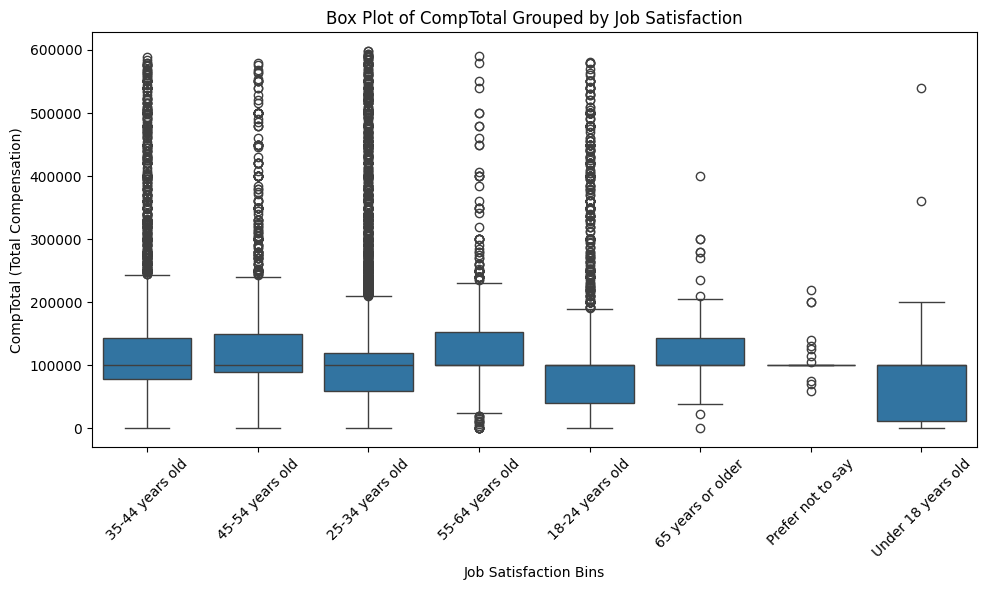

In [47]:
df_plot = df[df['CompTotal'] < 600000]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='CompTotal', data=df_plot)
plt.xticks(rotation=45)
plt.title('Box Plot of CompTotal Grouped by Job Satisfaction')
plt.xlabel('Job Satisfaction Bins')
plt.ylabel('CompTotal (Total Compensation)')
plt.tight_layout()
plt.show()

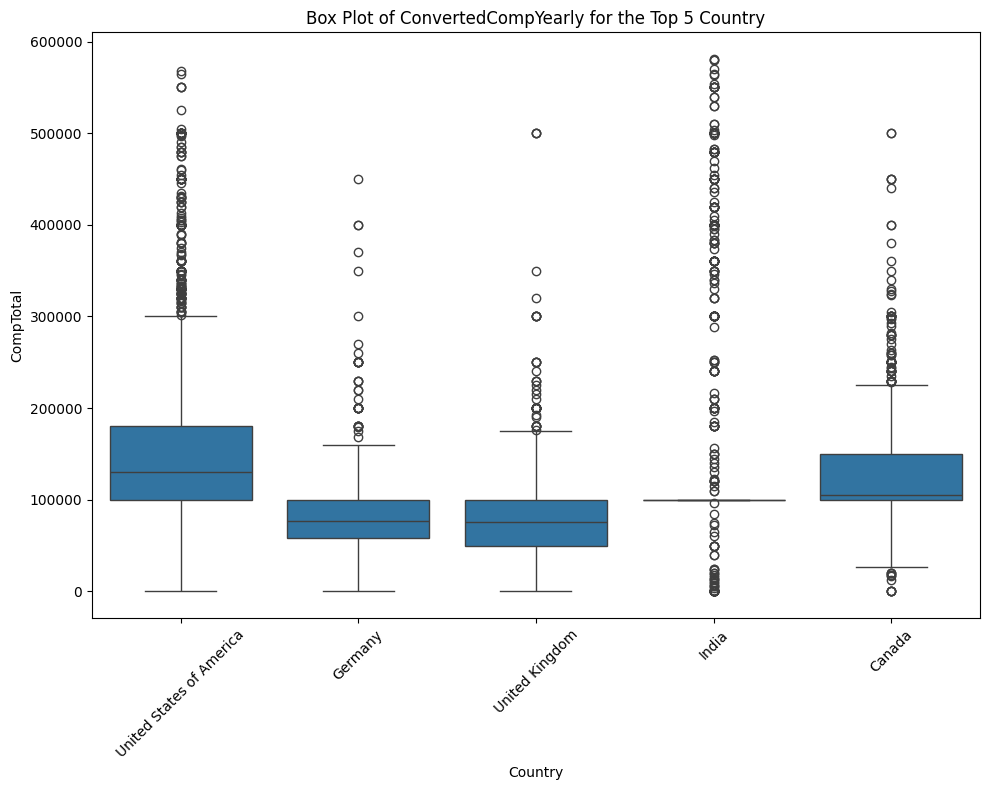

In [48]:
df = df[df['CompTotal'] < 600000]
top_5_country = df['Country'].value_counts().head(5).index

df_top_5 = df[df['Country'].isin(top_5_country)]

plt.figure(figsize=(10, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top_5)
plt.title('Box Plot of ConvertedCompYearly for the Top 5 Country')
plt.xticks(rotation=45)
plt.tight_layout()

Total Compensation is Maximum in United States

In [49]:
df1=pd.read_csv('/content/LanguageHaveWorkedWith_Cleaned.csv')
df2=pd.read_csv('/content/LanguageWantToWorkWith_Cleaned.csv')
df3=pd.read_csv('/content/DatabaseHaveWorkedWith_Cleaned.csv')
df4=pd.read_csv('/content/DatabaseWantToWorkWith_Cleaned.csv')
df5=pd.read_csv('/content/PlatformHaveWorkedWith_Cleaned.csv')
df6=pd.read_csv('/content/PlatformWantToWorkWith_Cleaned.csv')
df7=pd.read_csv('/content/WebframeHaveWorkedWith_Cleaned.csv')
df8=pd.read_csv('/content/WebframeWantToWorkWith_Cleaned.csv')


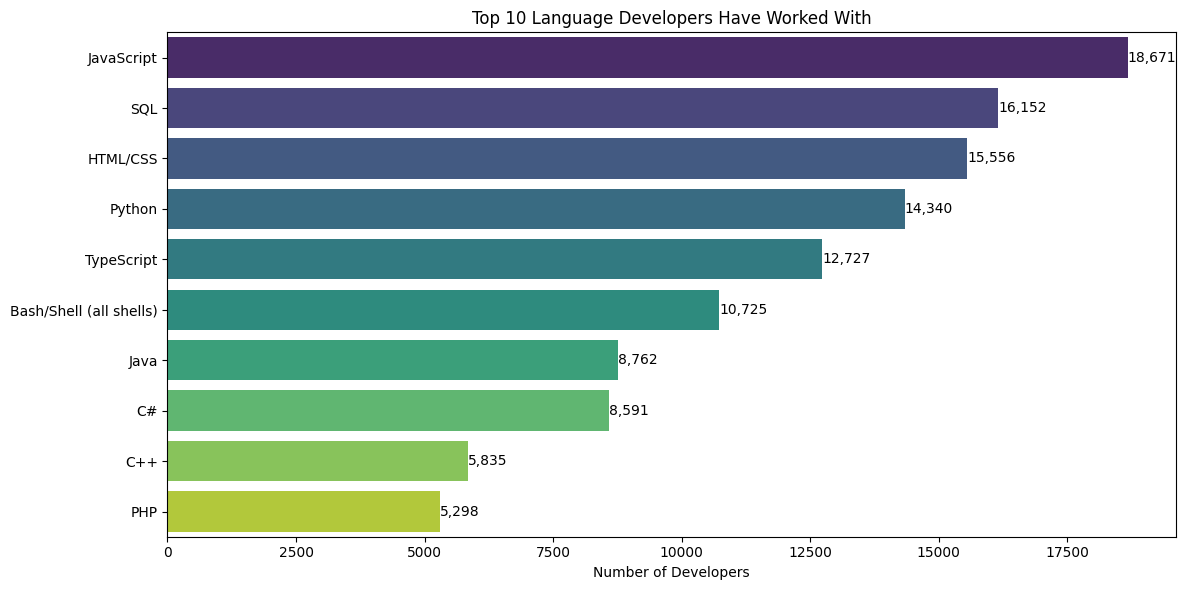

In [70]:

top_languages = df1['LanguageHaveWorkedWith'].value_counts().head(10).sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_languages.values,
    y=top_languages.index,
    palette='viridis'
)

# Customize the plot
ax.set_title('Top 10 Language Developers Have Worked With')
ax.set_xlabel('Number of Developers')
ax.set_ylabel('')

# Add value labels to each bar
for i, v in enumerate(top_languages.values):
    ax.text(v + 0.5, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()


JawaScript is the top Language Developers have worked with

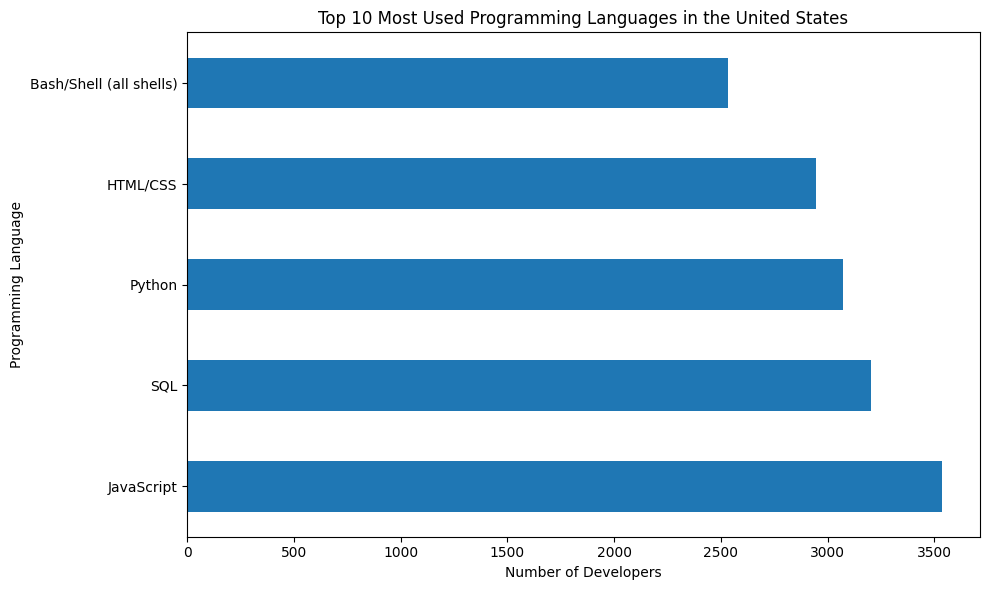

In [71]:
merged_df = pd.merge(
    df1,
    df[['ResponseId', 'Country']],
    on='ResponseId'
)
us_df = merged_df[merged_df['Country'] == 'United States of America']
top_5_languages = us_df['LanguageHaveWorkedWith'].value_counts().head(5)
top_5_languages.plot(kind='barh', x='LanguageHaveWorkedWith', y='ResponseId', figsize=(10, 6))
plt.title('Top 10 Most Used Programming Languages in the United States')
plt.xlabel('Number of Developers')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

JawaScript is the most widely used Language by Developers in USA

Text(0.5, 1.0, 'Top 10 Most Wanted Programming Languages')

<Figure size 1200x600 with 0 Axes>

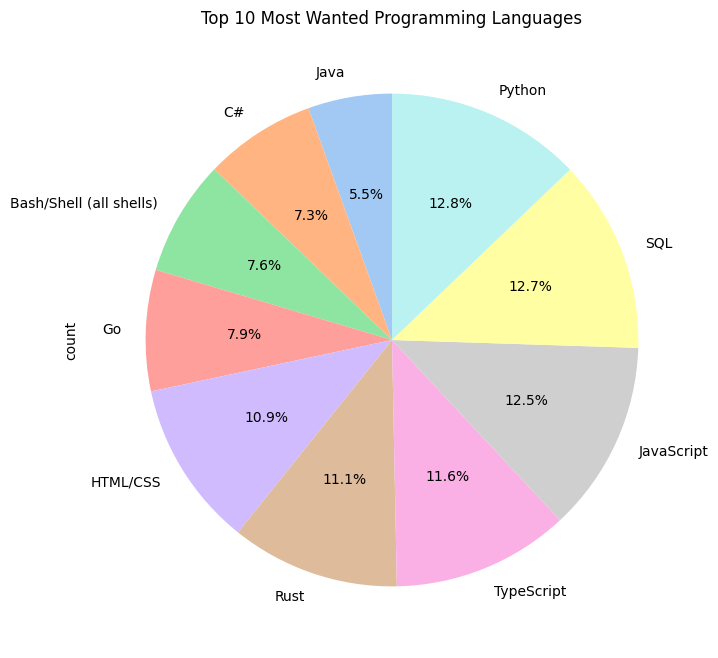

In [72]:
plt.figure(figsize=(12, 6))
top_10 = df2['LanguageWantToWorkWith'].value_counts().head(10).sort_values()

plt.figure(figsize=(8, 8))
top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Most Wanted Programming Languages')

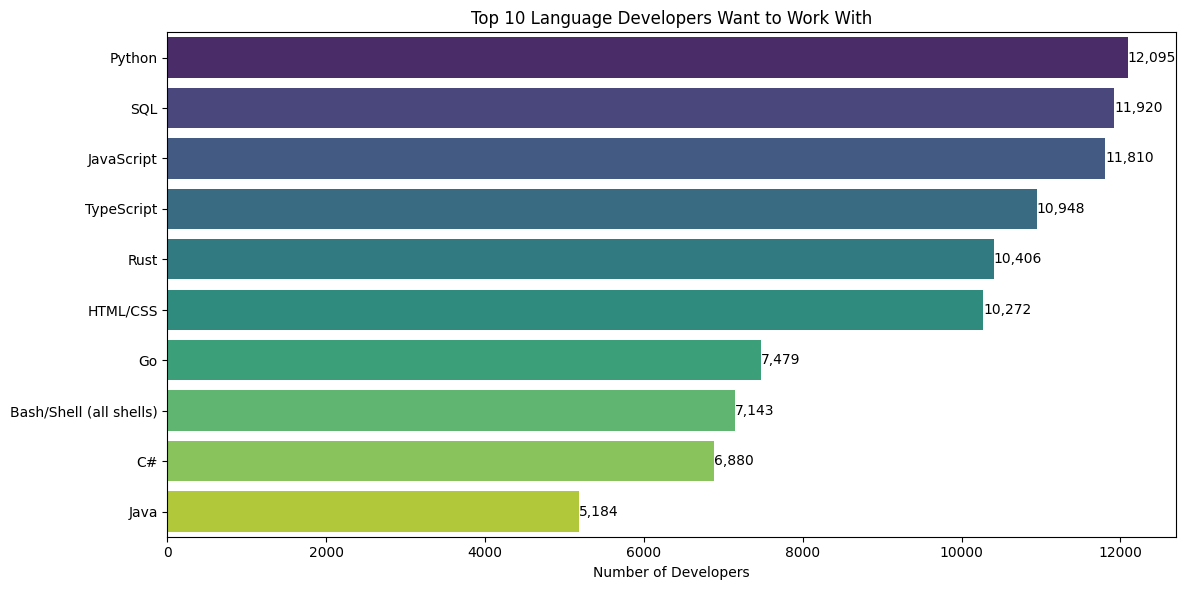

In [73]:
top_languages = df2['LanguageWantToWorkWith'].value_counts().head(10).sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_languages.values,
    y=top_languages.index,
    palette='viridis'
)

# Customize the plot
ax.set_title('Top 10 Language Developers Want to Work With')
ax.set_xlabel('Number of Developers')
ax.set_ylabel('')

# Add value labels to each bar
for i, v in enumerate(top_languages.values):
    ax.text(v + 0.5, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()


Python is the top Language Developers want to work with

Text(0.5, 1.0, 'Top 10 Databases Developers Have Worked With')

<Figure size 1200x600 with 0 Axes>

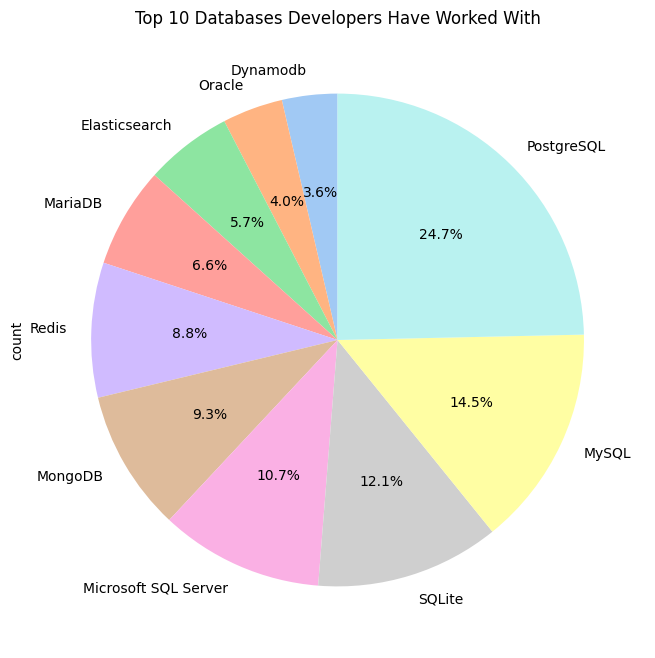

In [54]:
plt.figure(figsize=(12, 6))
top_10 = df3['DatabaseHaveWorkedWith'].value_counts().head(10).sort_values()

plt.figure(figsize=(8, 8))
top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Databases Developers Have Worked With')

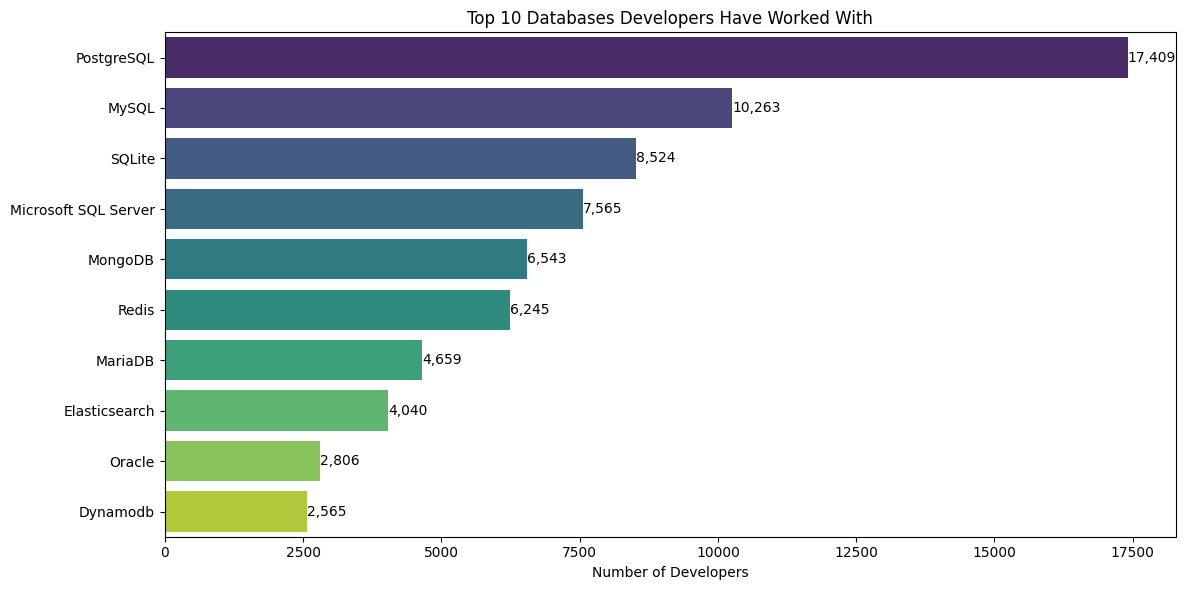

In [75]:

top_languages = df3['DatabaseHaveWorkedWith'].value_counts().head(10).sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_languages.values,
    y=top_languages.index,
    palette='viridis'
)

# Customize the plot
ax.set_title('Top 10 Databases Developers Have Worked With')
ax.set_xlabel('Number of Developers')
ax.set_ylabel('')

# Add value labels to each bar
for i, v in enumerate(top_languages.values):
    ax.text(v + 0.5, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

PostgreSQL is the top Database Developers have worked with

Text(0.5, 1.0, 'Top 10 Databases Developers Want to Work With')

<Figure size 1200x600 with 0 Axes>

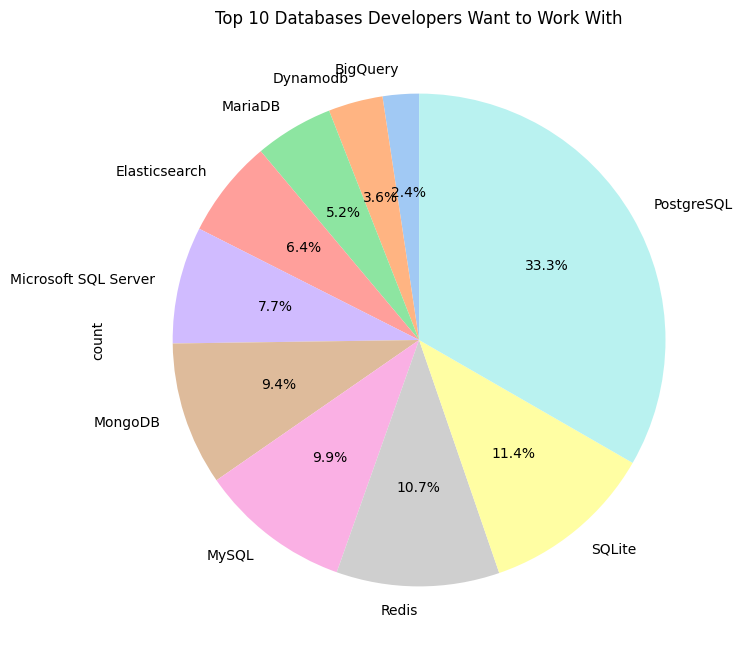

In [56]:
plt.figure(figsize=(12, 6))
top_10 = df4['DatabaseWantToWorkWith'].value_counts().head(10).sort_values()

plt.figure(figsize=(8, 8))
top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Databases Developers Want to Work With')

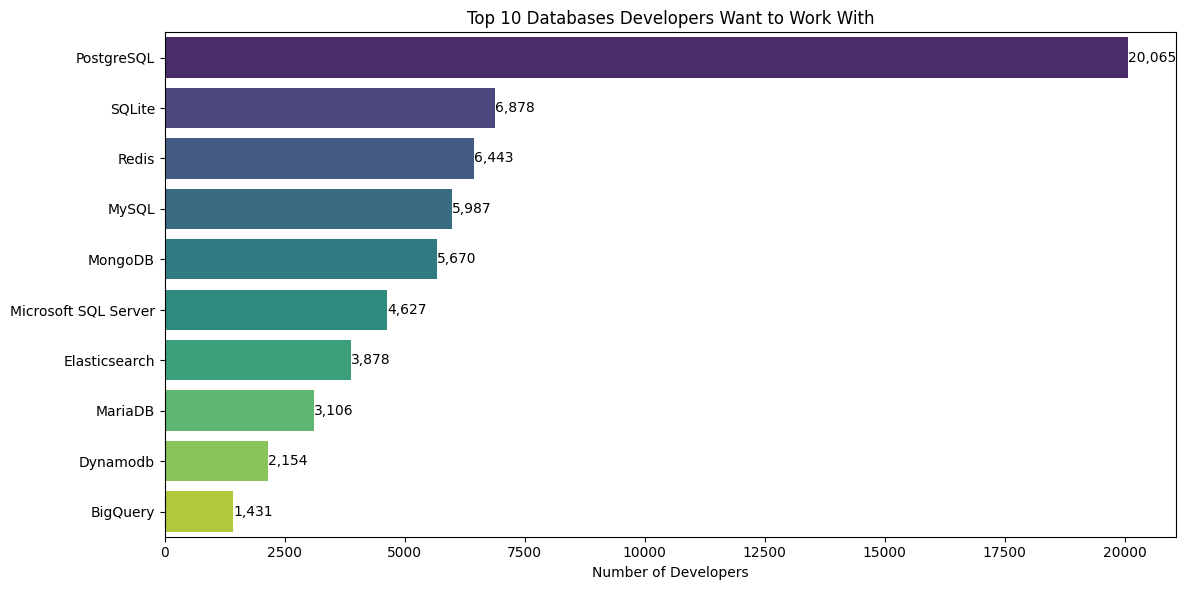

In [77]:

top_languages = df4['DatabaseWantToWorkWith'].value_counts().head(10).sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_languages.values,
    y=top_languages.index,
    palette='viridis'
)

# Customize the plot
ax.set_title('Top 10 Databases Developers Want to Work With')
ax.set_xlabel('Number of Developers')
ax.set_ylabel('')

# Add value labels to each bar
for i, v in enumerate(top_languages.values):
    ax.text(v + 0.5, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

PostgreSQL is the top Database Developers want to work with

Text(0.5, 1.0, 'Top 10 Platform Developers Have Worked With')

<Figure size 1200x600 with 0 Axes>

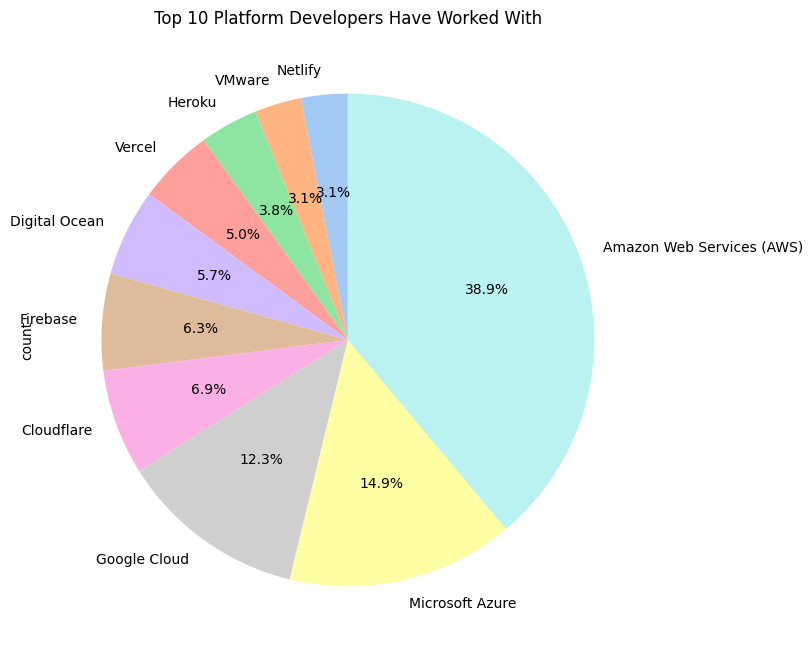

In [58]:
plt.figure(figsize=(12, 6))
top_10 = df5['PlatformHaveWorkedWith'].value_counts().head(10).sort_values()

plt.figure(figsize=(8, 8))
top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Platform Developers Have Worked With')

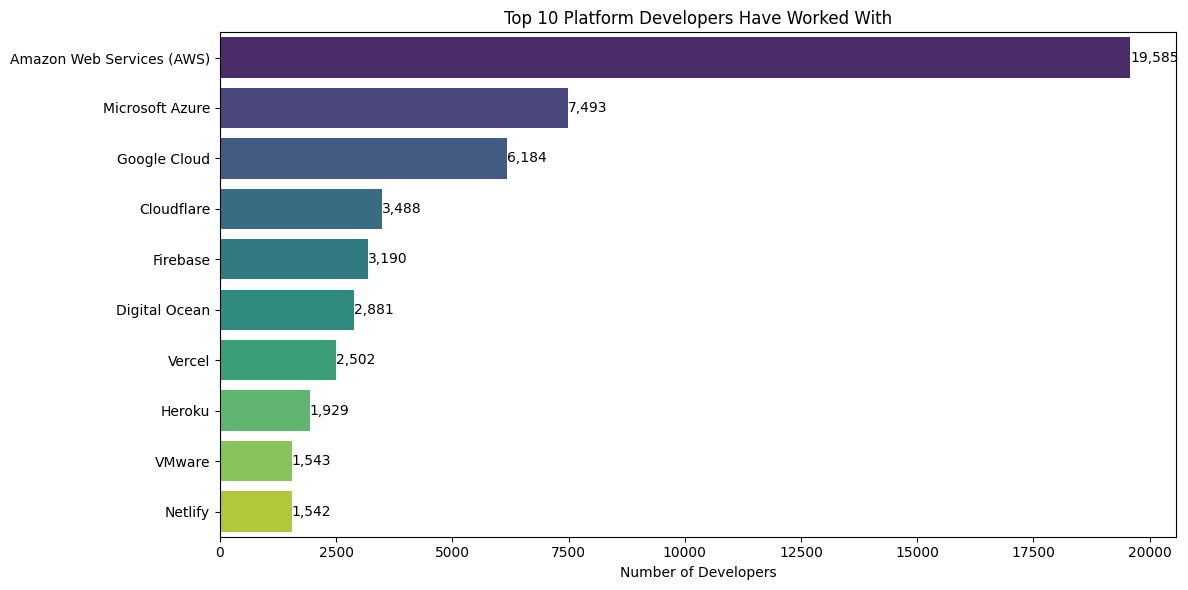

In [78]:
top_languages = df5['PlatformHaveWorkedWith'].value_counts().head(10).sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_languages.values,
    y=top_languages.index,
    palette='viridis'
)

# Customize the plot
ax.set_title('Top 10 Platform Developers Have Worked With')
ax.set_xlabel('Number of Developers')
ax.set_ylabel('')

# Add value labels to each bar
for i, v in enumerate(top_languages.values):
    ax.text(v + 0.5, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

Amazon Web Services is the top Platform Developers have worked with

Text(0.5, 1.0, 'Top 10 Platform Developers want to Work With')

<Figure size 1200x600 with 0 Axes>

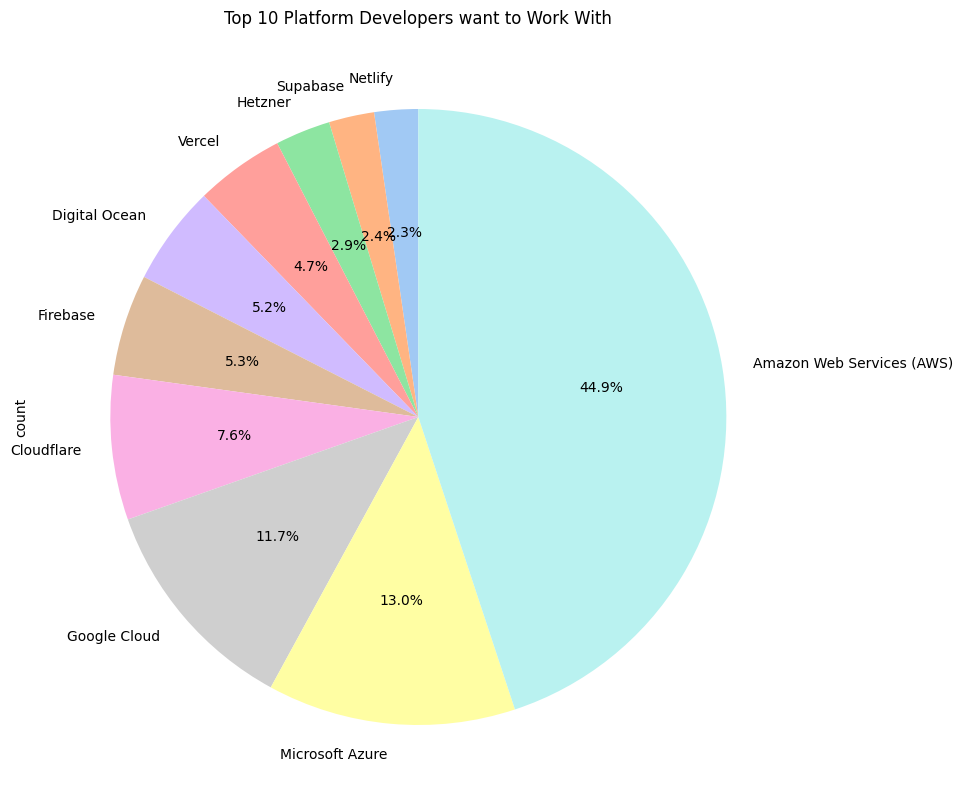

In [60]:
plt.figure(figsize=(12, 6))
top_10 = df6['PlatformWantToWorkWith'].value_counts().head(10).sort_values()

plt.figure(figsize=(10, 10))
top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 10 Platform Developers want to Work With')

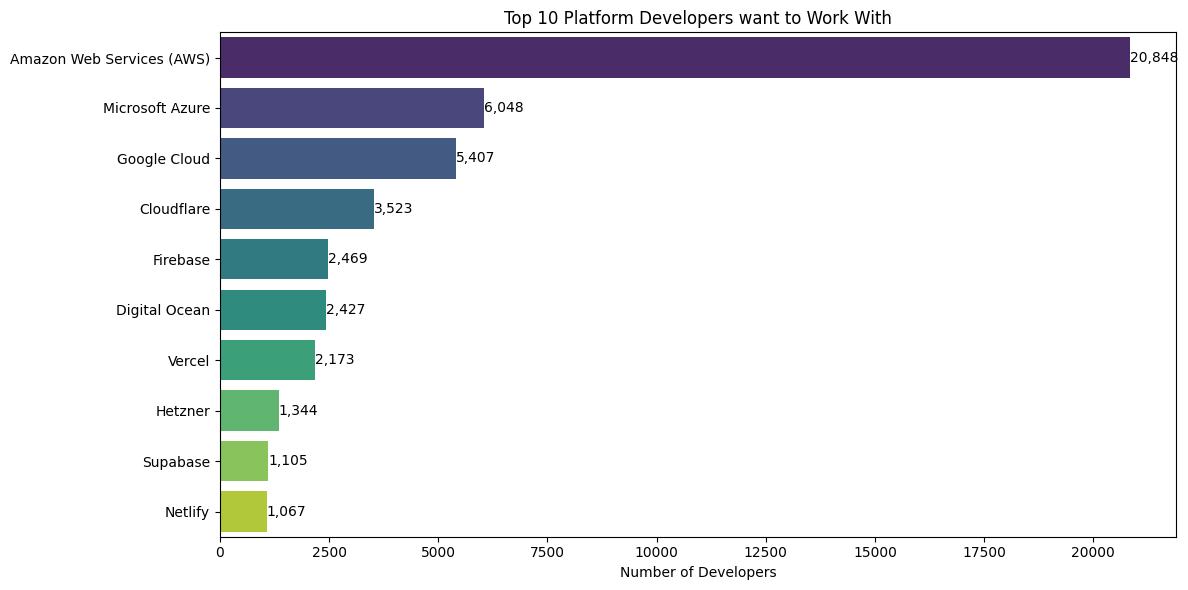

In [79]:

top_languages = df6['PlatformWantToWorkWith'].value_counts().head(10).sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_languages.values,
    y=top_languages.index,
    palette='viridis'
)

# Customize the plot
ax.set_title('Top 10 Platform Developers want to Work With')
ax.set_xlabel('Number of Developers')
ax.set_ylabel('')

# Add value labels to each bar
for i, v in enumerate(top_languages.values):
    ax.text(v + 0.5, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

Amazon Web Services is the top Platform Developers want work with in future